In [204]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [205]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.000000,sedan,277,2.000000,Petrol,yes,1991,320
1,Mercedes-Benz,7900.000000,van,427,2.900000,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.000000,sedan,358,5.000000,Gas,yes,2003,S 500
3,Audi,23000.000000,crossover,240,4.200000,Petrol,yes,2007,Q7
4,Toyota,18300.000000,crossover,120,2.000000,Petrol,yes,2011,Rav 4


## Preprocessing

In [206]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [207]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')
# dropped the Model category because it is irrelevant to increasing the accuracy of my model.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [208]:
data.isnull().sum()
#this shows the missing values in my dataset

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [209]:
data_no_mv = data.dropna(axis=0)
#I drop the missing values here, which is acceptable because it is less than 5% of the observations.

In [210]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### PDFs
#### Here I check the Probability Distribution Functions (PDF) of the Independent Variables Price, Year, Mileage, and Engine Volume to identify and weed out the Outliers. They can adversely affect the accuracy of my Regression model because a Regression attempts to draw a line closest to all the data; including the Outliers might inflate/deflate my model. 

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

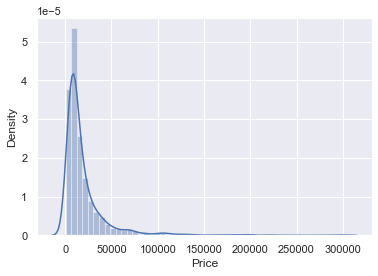

In [211]:
sns.distplot(data_no_mv['Price'])

In [212]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')
# I decided to exclude the observations in the 99th percentile and above to get rid of the Outliers.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

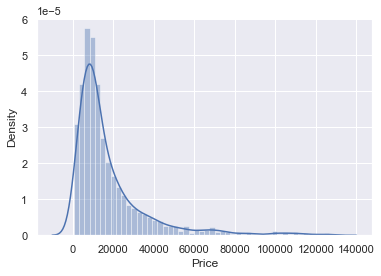

In [213]:
sns.distplot(data_1['Price'])
# Now the Price variable only includes observations up to the 98th percentile and has much fewer Outliers.

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

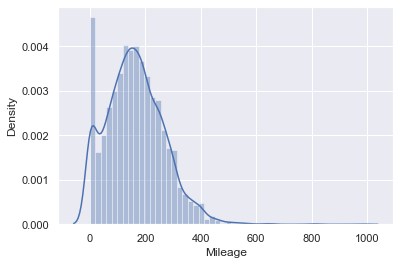

In [214]:
sns.distplot(data_no_mv['Mileage'])

In [215]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
# Similar to the Price variable, I decided to exclude the observations in the 99th percentile and beyond to remove the Outliers.

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

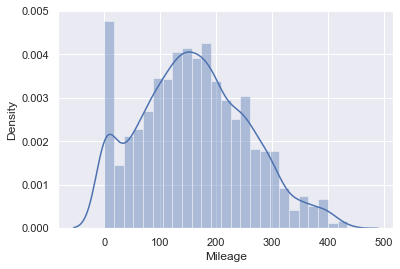

In [216]:
sns.distplot(data_2['Mileage'])

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

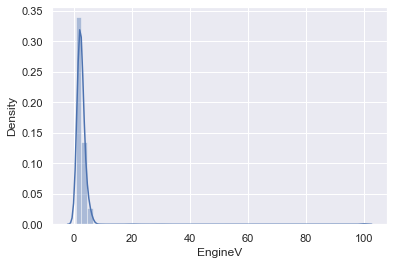

In [217]:
sns.distplot(data_no_mv['EngineV'])
# The PDF looks unusual compared to the previous two.

In [218]:
data_3 = data_2[data_2['EngineV']<6.6]
# After research, I found out that the normal interval of the Engine Volume falls between 06. to 6.5.
# The observations beyond 6.5 are mostly 99.99 - a variable that was used in the past to label missing values. It is a bad idea to label missing values in this manner now.
# I decided to remove such observations as they are Outliers.

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

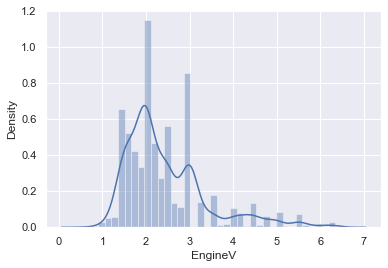

In [219]:
sns.distplot(data_3['EngineV'])

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

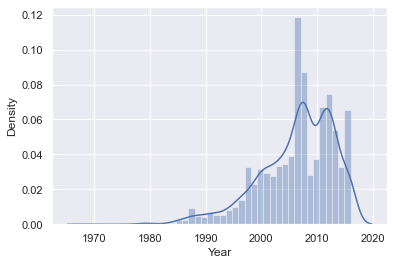

In [220]:
sns.distplot(data_no_mv['Year'])
# Most cars are newer but there are a few vintage cars in the variable.

In [221]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
# I decided to remove the 1st percentile and keep the rest

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

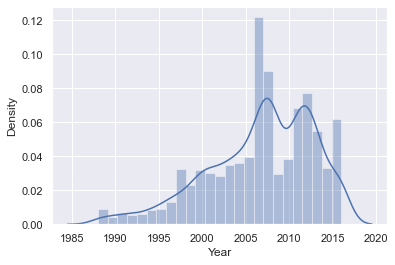

In [222]:
sns.distplot(data_4['Year'])

In [223]:
data_cleaned = data_4.reset_index(drop=True)
#I reset the index to completely forget the old index.

In [224]:
data_cleaned.describe(include='all')
# This excludes ~250 problematic observations that could've hindered the accuracy of my model if left unchecked.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

### Distribution

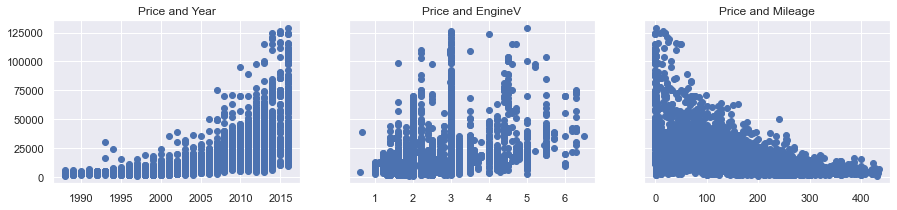

In [225]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()
# These are not linear regressions and shows that I should first transform one or more variables to run the Regression.

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

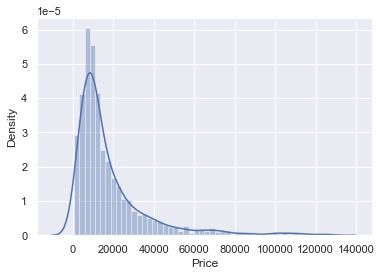

In [226]:
sns.distplot(data_cleaned['Price'])
#Here I check the distribution of the dependent variable Price.

In [227]:
log_price = np.log(data_cleaned['Price'])
# Here I used the log transformation to fix heteroscedasticity and remove outliers from the variable Price.
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.000000,sedan,277,2.000000,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.000000,van,427,2.900000,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.000000,sedan,358,5.000000,Gas,yes,2003,9.495519
3,Audi,23000.000000,crossover,240,4.200000,Petrol,yes,2007,10.043249
4,Toyota,18300.000000,crossover,120,2.000000,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.000000,van,163,2.500000,Diesel,yes,2008,9.350102
3864,Toyota,17900.000000,sedan,35,1.600000,Petrol,yes,2014,9.792556
3865,Mercedes-Benz,125000.000000,sedan,9,3.000000,Diesel,yes,2014,11.736069
3866,BMW,6500.000000,sedan,1,3.500000,Petrol,yes,1999,8.779557


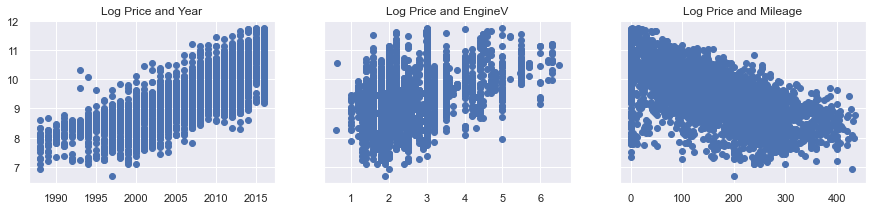

In [228]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()
# After performing the log transformation on Price, the PDFs now show a linear regression line.

In [229]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
# Here I dropped the variable Price and replaced it with log_Price because the former has no statistical significance to my model.

### Multicollinearity

In [230]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
# Through Statsmodels, I used the Variance Inflation Factor here to check for multicollinearity in my variables.
# While I expect multicollinearity in my data, I wanted to check the variables the introduce unnacceptable correlation to my model; they have high VIFs.

In [232]:
vif

,VIF,features
0,3.792300,Mileage
1,10.332226,Year
2,7.638286,EngineV


In [233]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
# Dropped 'Year' because it has an unacceptably high VIF and is therefore a feature that introduces correlation in my data

In [234]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
# This identifies categorical variables and creates dummies automatically to avoid multicollinearity in my Model

In [235]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.000000,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.900000,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.000000,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.200000,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.000000,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [236]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [237]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [238]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()
# Here I arranged the data into a table.

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.900000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.200000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Training my Regression Model


In [239]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)
# I removed log_price in the inputs to exclude the transformed dependent variable from my inputs.

In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
# This standardizes my inputs; in other words, it subtractrs the mean and divide by the standard deviation from each observation.

In [241]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)
# I did this to avoid overfitting my model to my data.
# The default setting of the train-test split is 75-25, but here I chose 80-20.
# I used 'random_state' to ensure that I get the same random shuffle every time I split my data.


In [242]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [243]:
y_hat = reg.predict(x_train)

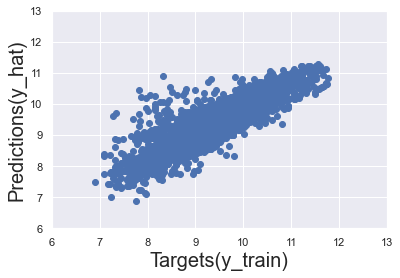

In [244]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size=20)
plt.ylabel('Predictions(y_hat)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Using Residuals to check the Model

/Users/jovemmanuelr.ermitano/opt/anaconda3/envs/JERETech/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

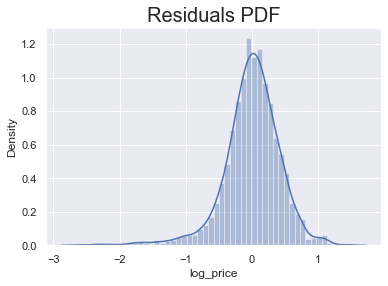

In [245]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size=20)
#to check whether the Residuals is normally distributed and the variability of the outcome

In [246]:
reg.score(x_train, y_train)

0.7583866949948946

In [247]:
reg.intercept_
# The intercept or bias calibrates the model: without it, each feature will be off the mark.

9.42000975196255

In [248]:
reg.coef_

array([-0.45831235,  0.21216834,  0.01266665,  0.01260123, -0.14001857,
       -0.18336064, -0.06485382, -0.09380217, -0.14413603, -0.09901954,
       -0.19434177, -0.12129436, -0.16354206, -0.12097883, -0.0312541 ,
       -0.15098459,  0.31987238])

In [249]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

# A feature with a coefficient of 0 means that it has no significance to the model.

,Features,Weights
0,Mileage,-0.458312
1,EngineV,0.212168
2,Brand_BMW,0.012667
3,Brand_Mercedes-Benz,0.012601
4,Brand_Mitsubishi,-0.140019
5,Brand_Renault,-0.183361
6,Brand_Toyota,-0.064854
7,Brand_Volkswagen,-0.093802
8,Body_hatch,-0.144136
9,Body_other,-0.099020


In [250]:
#to know the categorical variables of my features
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [251]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [252]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [253]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

## Testing my Model

In [254]:
y_hat_test = reg.predict(x_test)

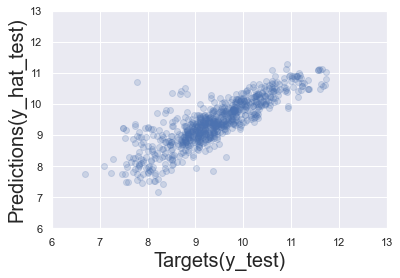

In [255]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size=20)
plt.ylabel('Predictions(y_hat_test)', size=20)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [256]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
#this returns the exponential of Y Hat Test and removes the log. 
df_pf.head()

,Prediction
0,10697.793775
1,24093.437241
2,7535.144896
3,37079.226494
4,11388.000883


In [257]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1   10.021271
2    7.824046
3   10.896739
4    9.121509
Name: log_price, dtype: float64

In [258]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10697.793775,2300.000000
1,24093.437241,22500.000000
2,7535.144896,2500.000000
3,37079.226494,54000.000000
4,11388.000883,9150.000000
5,60325.814804,69999.000000
6,21197.766449,38888.000000
7,11475.661096,15700.000000
8,23199.317634,28713.750000
9,12751.784596,12000.000000


In [259]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10697.793775,2300.000000,-8397.793775,365.121468
1,24093.437241,22500.000000,-1593.437241,7.081943
2,7535.144896,2500.000000,-5035.144896,201.405796
3,37079.226494,54000.000000,16920.773506,31.334766
4,11388.000883,9150.000000,-2238.000883,24.459026
5,60325.814804,69999.000000,9673.185196,13.819033
6,21197.766449,38888.000000,17690.233551,45.490212
7,11475.661096,15700.000000,4224.338904,26.906617
8,23199.317634,28713.750000,5514.432366,19.204849
9,12751.784596,12000.000000,-751.784596,6.264872


In [260]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%2f' % x)
df_pf.sort_values(by=['Difference%'])
# This table shows the difference in percetage of the prediction and the target using the test data.
# I included the Residuals because examining them as the same as examining the heart of the alogirthm.

,Prediction,Target,Residual,Difference%
252,9899.921978,9900.000000,0.078022,0.000788
518,4200.859877,4200.000000,-0.859877,0.020473
308,8903.039701,8900.000000,-3.039701,0.034154
72,4002.736685,4000.000000,-2.736685,0.068417
512,32545.427249,32500.000000,-45.427249,0.139776
648,21259.363552,21335.000000,75.636448,0.354518
723,6074.861286,6100.000000,25.138714,0.412110
549,3734.107738,3750.000000,15.892262,0.423794
259,6169.625806,6200.000000,30.374194,0.489906
769,29676.632297,29500.000000,-176.632297,0.598754
